## Introdução

Antes de começarmos, preciso garantir que possamos conversar na mesma língua. Por isso, peço que leia a [introdução ao aprendizado de máquina](https://matheusfacure.github.io/AM-Essencial/) que fiz especialmente para quem quer começar a entender esse assunto. Lá, falo sobre o que é e para que serve aprendizado de máquina e apresento alguns do principais conceitos dessa ciência, como os três tipos de aprendizado, o dilema de viés e variância, treinamento, avaliação e validação cruzada. Reconheço que é um post um pouco longo, mas, por favor, invista um pouco do seu tempo nele e entenda bem os conceitos lá apresentados. 

Bom, espero que você tenha lido o que recomendei. A partir desse ponto, vou usar alguns dos termos que apresentei lá (e que, talvez, você tenha acabado de aprender). Isso me permitirá tornar este post mais curto, já que não precisarei explicar todos os conceitos de aprendizado de máquina do zero.

**Aviso:** Ao final deste post, você entenderá intuitivamente o que é uma rede neural e será capaz de treinar uma para reconhecimento de imagem. Mesmo assim, esse post é apenas uma breve introdução ao aprendizado de máquina contemporâneo. Pensei nele como uma forma de instigar a sua curiosidade e lhe convencer de que aprendizado de máquina é um assunto no qual vale a pena se aprofundar. Assim, do **fundo do meu coração**, não terminem essa leitura achando que já sabem suficiente e, por favor, continuem aprendendo mais, bem mais, do que o conteúdo apresentado aqui.

## Aprendizado de Máquina Contemporâneo

A maioria dos algoritmos de aprendizado de máquina são do século passado. Alguns, como redes neurais, são especialmente velhos, tendo sido inventados na década de 50. Por que, então, só agora é que estamos vendo aprendizado de máquina aparecendo em todos os cantos e sendo anunciado pelas revistas e jornais aos quatro ventos? Podemos argumentar que, embora os algoritmos em si sejam velhos, algumas pequenas melhorias mais recentes os tornaram, finalmente, extremamente úteis. Isso é parcialmente verdade, mas foram outros dois fatores que mais contribuíram para o atual renascimento da inteligência artificial:  

    1. Aumento do poder computacional (leia-se GPUs enormes)
    2. Aumento da disponibilidade de dados (leia-se *Big Data* ou simplesmente bases de dados maiores)

Infelizmente, ainda hoje, para que um modelo de aprendizado de máquina consiga extrapolar um padrão aprendido, ele precisa de uma abundância de exemplos desses padrões. Por exemplo, para que um sistema inteligente consiga interpretar uma palavra, ele precisa antes ver milhões de frases para entender como as plavras se relacionam. Isso só foi possível recentemente, com expansão da quantidade de dados e da capacidade computacional para processá-los. 

Devemos ter em mente que os **sistemas de inteligência artificias contemporâneos não são nada mais do que modelos matemáticos complexos que conseguem aprender uma representação simplificada da realidade, a partir da extração de padrões estatísticos presentes nos dados, que são, por sua vez, extraídos dessa mesma realidade que motiva o aprendizado**. E, [por enquanto](https://arxiv.org/abs/1605.06065), um ponto fraco desses sistemas ou modelos estatísticos é que eles precisam de muitos dados para conseguir entender os padrões que se apresentam na nossa complexa realidade.

Mas como exatamente esses sistemas conseguem entender a nossa realidade? Infelizmente, ainda não podemos dizer com certeza como isso é feito. Vou então dar uma explicação que é a mais aceita e cujas evidenciais são mais fortes. Em poucas palavras, os sistemas de inteligência artificial modernos primeiro aprendem uma **representação interna abstrata** dos dados brutos e, a partir dessa representação abstrata, realizam alguma tarefa, geralmente uma previsão. Por exemplo, considere a tarefa de prever que objeto está em uma imagem. Nesse caso, os dados são simples pixeis com quantidades de vermelho, verde e azul (se a imagem for preta e branca, os pixeis são ainda mais simples, indicando apenas a quantidade de preto). Como é muito difícil sair desses dados brutos para conceitos abstratos - como a transparência de uma garrafa pet, um olho em uma face, o telhado de uma casa -, o sistema antes converte os pixeis de uma imagem em algo mais abstrato, como o conceito visual de um olho. 

Isso é provavelmente o que eu e você fazemos quando enxergamos. O nosso corpo percebe raios multicoloridos refletidos nos objetos, mas o que vemos são conceitos com uma carga semântica muito maior, tais como a textura da madeira em uma cadeira ou a silhueta opaca de um gato branco passeando sob a meia luz. Para representar esse nível de abstração, os sistemas contemporâneos de IA são geralmente construídos em camadas. Podemos pensar nelas como **níveis hierárquicos de abstração** que serão aprendidos por um modelo estatístico. Por exemplo, a primeira camada de um sistema pode aprende a abstrair pixeis em cantos e quinas de objetos ou diferenças de contraste e luminosidade; a segunda camada, partido das abstrações da primeira, converte os cantos e quina em formas mais elaborados, como círculos, triângulos e quadrados; a terceira camada então pode partir dessas formas para criar abstrações sobre parte de objetos, como a roda de um carro ou o bico de um papagaio; por fim, o sistema usa essas abstrações finais para identificar o que está em uma foto colorida. (Isso é mais do que um mero exemplo. Na verdade, existem [formas um tanto divertidas de ver as abstrações aprendidas por IAs](https://matheusfacure.github.io/2017/05/09/deepdream/)).

 Esse modo de estruturar os sistemas de IA é o que leva o nome de **Deep Learning** (aprendizado profundo) ou aprendizado de representações. A palavra "profundo" vem do simples fato de construímos nossos sistemas empilhando camadas.

## Neurônios

Nesta introdução, para exemplificar a construção e o treinamento de um sistema moderno de IA, vamos realizar uma simples tarefa de visão computacional, na qual usaremos uma rede neural bem simples para reconhecer dígitos escritos. Em termos técnicos, será uma tarefa de [OCR (Optical Character Recognition)](https://pt.wikipedia.org/wiki/Reconhecimento_%C3%B3tico_de_caracteres). Mas, antes de entendermos o que são e como treinar redes neurais, precisamos falar sobre seu componente mais básico: os neurônios. 

![neurônio](https://matheusfacure.github.io/img/perceptron.png)

Como grande parte dos algoritmos de aprendizado de máquina, os neurônios são modelos matemáticos (ou funções) que representam a realidade de forma simplificada. Eles são compostos por uma soma ponderada, seguida ou não de uma função ativação. Por exemplo, considere a tarefa de prever se o preço de uma casa será maior ou menor do que a média, dadas as variáveis \\(x_1\\), o tamanho da casa em metros quadrados, \\(x_2\\), o índice de pobreza vizinhança e \\(x_3\\) o tamanho do meu cabelo. Podemos facilmente utilizar um neurônio para resolver essa tarefa. Note que, provavelmente, quanto maior \\(x_1\\), maior a probabilidade da casa ter um preço acima da média (e vice versa). Assim, devemos esperar que o peso de \\(x_1\\), \\(w_1\\), na soma ponderada do nosso neurônio seja positivo, indicando que essa variável tem um impacto igualmente positivo na probabilidade do preço da casa ser acima da média. Com o mesmo raciocínio, podemos argumentar que \\(w_2\\) será negativo. Note que esses dois pesos não precisam ter a mesma intensidade. Pode ser que o impacto positivo de \\(x_1\\) seja muito maior que o impacto negativo de \\(x_2\\), de forma que \\(w_1\\) seja maior que \\(w_2\\). Em palavras, pode ser que o tamanho da casa seja um determinante mais importante do preço do que o índice de pobreza da vizinhança. Por fim, é provável que o tamanho do meu cabelo, \\(x_3\\), não tenha muito impacto no preço de uma casa. Por isso, esperamos que \\(w_3\\) seja muito próximo de zero na soma ponderada do nosso neurônio. Isso indica que essa variável influencia pouco o preço da casa. Repare também que temos uma variável que é sempre \\(1\\). A ponderação desse \\(1\\) com o \\(w_0\\) é o que chamamos de viés. Esse viés captura a tendência da casa ter valor alto, uma vez que já tenhamos considerado as outras variáveis. Por fim, é importante ressaltar que os \\(w\\)s são o que chamamos de parâmetros do modelo. Eles são variáveis que o neurônio (e, mais para frente, a rede neural) vai aprender (ou estimar) durante o treinamento.

Além da soma ponderada, nosso neurônio precisa de uma função de ativação. Isso porque a soma ponderada pode nos dar um resultado qualquer, mas, como nossa previsão é uma probabilidade, precisamos de uma função ativação que converta um número qualquer, positivo ou negativo, em um valor entre 0 e 1. A função que faz isso chama função [softmax](https://en.wikipedia.org/wiki/Softmax_function), então a usaremos após a soma ponderada do nosso neurônio. Existem várias funções de ativação e, dependendo da tarefa em questão, uma é mais recomendada do que outra. Infelizmente, para falar delas é preciso mais conhecimento matemático. Intuitivamente, quando falarmos delas nas redes neurais, pense na função ativação como algo que dá um comportamento mais complexo aos neurônios. Elas também são fundamentais nas redes neurais, para que essas consigam representar padrões complexos. 

## Redes Neurais Artificiais

Infelizmente, os neurônios são bastante limitados. Em aprendizado de máquina, queremos que um algoritmo possa aprender qualquer tipo de padrão presente nos dados, mas isso não é possível com um simples neurônio. Por isso, construímos as redes neurais, que são simplesmente vários neurônios conectados. Pense nos neurônios como blocos de Lego e nas redes neurais como estruturas que montamos empilhando esses blocos de Lego. Dependendo da tarefa, uma estrutura pode se mais útil do que outra. No entanto, aqui, vamos considerar apenas a estrutura mais simples e mais comun de rede neural, o modelo de **redes neurais *feedforward* densas**.

![neurônio](http://www.texample.net/media/tikz/examples/PNG/neural-network.png)

Na rede neural acima, como exemplo, podemos dizer que ainda estamos lidando com o problema de prever se o preço de uma casa será acima ou abaixo da média. Na entrada da rede, temos as mesmas 3 variáveis mais o viés, que são representados pelas bolinhas verdes. Isso é o que chamamos de camada de entrada da rede neural. Em seguida, utilizando 5 neurônios, realizamos 5 somas ponderadas seguidas de uma função de ativação. Essas operações são representadas pelas bolinhas azuis, que recebem o nome de camada oculta da rede neural. Por fim, utilizamos um único neurônio que realiza uma soma ponderada do resultado dos neurônios anteriores e então converte essa soma ponderada em uma probabilidade com a função softmax. Isso é o que chamamos de camada de saída da rede neural e está representado pela bolinha vermelha.

Ignore a camada de entrada (verde) por um momento. Note como a camada de saída mais a camada oculta é exatamente o modelo de neurônio que vimos antes? A camada de saída é simplesmente um modelo de neurônio, que está tratando a camada oculta como se fosse as variáveis independentes que determinam a variável de resposta (no nosso exemplo, a probabilidade do preço da casa ser alto). Assim, podemos ver que a rede neural está **aprendendo novas variáveis** e usando um modelo de neurônio nessas novas variáveis. Esse é o princípio básico de *deep learning*: aprender variáveis representativas, geralmente mais abstratas, que auxiliem na tarefa em questão, no caso, uma tarefa de previsão.

Podemos ir ainda um passo além e adicionar uma segunda camada oculta. 

![neurônio](http://cs231n.github.io/assets/nn1/neural_net2.jpeg)

Isso aumenta ainda mais o poder representativo da rede neural. Lembre-se de que **podemos pensar nas camadas da rede neural como níveis hierárquicos de abstração**.

## Treinando RNAs

Agora que entendemos o que são redes neurais em um nível intuitivo, precisamos saber como treiná-las. Isso é feito por um processo de otimização no qual minimizamos uma função custo (ou objetivo). Para manter o nível de simplicidade, pense na função custo como algo que mede a diferença entre o que a rede neural prevê o que de fato foi observado. Por exemplo, se a rede neural prever um valor pequeno para a probabilidade de uma casa ter preço acima da média, mas a casa, na verdade, for bastante cara, então a função custo terá um valor alto.

Para iniciar o treinamento, vamos chutar alguns valores para os \\(w\\)s de cada neurônio. Em seguida, vamos ver a previsão da rede neural em alguns dados, que, muito provavelmente, será péssima. Dessa forma, os \\(w\\)s iniciais serão associados a um alto custo ou a uma **região elevada na superfície de custo**. No treinamento então, vamos atualizar os \\(w\\)s de maneira iterativa, de forma a diminuir o custo. Isso é feito com a técnica de gradiente descendente estocástico, que pode ser entendida como uma descida na superfície de custo de uma tarefa de otimização.

![neurônio](https://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_gradient_descent_1.png)

Para entender a fundo essa técnica, é preciso saber cálculo multivariado, mas, intuitivamente, ela é bem simples. Em primeiro lugar, pegamos aleatoriamente (daí a palavra estocástico) um pequeno punhado de dados para conseguir uma estimativa da nossa posição na superfície de custo. Então, movemos os parâmetros \\(w\\) na direção oposta da inclinação dessa superfície. Isso é como dar um passo para baixo na superfície de custo. Com passos suficientes, nossa esperança é que os \\(w\\) nos coloque em uma região de custo (ou erro) baixa o suficiente.

## Construindo e Treinando uma Rede Neural Artificial


Muito bem, tudo isso já está parecendo bastante promissor. Vamos então construir e treinar uma rede neural de duas camadas ocultas para uma a trefa simples de reconhecimento de caracteres em imagens. Para isso, vou usar a linguagem de programação Python, mas não se preocupe, não será preciso saber programar para entender o que vem a seguir. Na verdade, quase não vou usar programação. Peço então que, por hora, você pense no Python apenas como um programa de computador como outro qualquer. Com ele, podemos digitar uma série de comandos para que o computador os execute. Aqui, vou simplesmente mostrar quais os comando necessários para construir e treinar uma simples rede neural.

Junto com o Python, vou usar alguns pacotes para ajudar na construção e treinamento de redes neurais. Você pode pensar nesses pacotes como extensões de um programa de computador. Mais concretamente, pense em um pacote do Python como uma fonte nova que você baixa para seu editor de texto. Particularmente importante será o pacote [TensorFlow](https://en.wikipedia.org/wiki/TensorFlow), que foi desenvolvido pelo Google e feito *open source* (aberto) em 2015.

Se você ainda não tem esses programas, não se preocupe. Também fiz um [tutorial sobre como instalá-los](https://lamfo-unb.github.io/2017/06/10/Instalando-Python/). Sugiro que você instale os programas necessários e acompanhe o tutorial a seguir executando cada passo no seu computador.

Em mais enrolações, no Python, vamos importar alguns pacotes:

In [1]:
import tensorflow as tf # importa o TensorFlow
from tensorflow.contrib.learn import DNNClassifier # importa o modelo de rede neural do TensorFlow

# pacotes adicionais
import numpy as np # para computação numérica menos intensiva
import os # para criar pastas

**OBS**: em uma sequência de comandos (código) de Python, o computador ignora tudo que for escrito após #, por isso, # indica o início de um comentário meu explicando o código.

### Os dados

Em primeiro lugar, vamos ver como são nossos dados. Já disse que trabalharemos com OCR. Em particular, vamos usar a base de dados [MNIST](https://en.wikipedia.org/wiki/MNIST_database), que contém 55 mil dados de treino e 10 mil dados de teste. Os dados são imagens de 28x28 pixeis, o que nos dá 784 variáveis para colocar na camada de entrada da nossa rede neural. Mas, antes disso, vamos criar uma nova pasta no nosso computador e baixar esses dados nela.

In [2]:
# criamos uma pasta para colocar os dados
if not os.path.exists('tmp'): # se a pasta não existir
    os.makedirs('tmp') # cria a pasta

# baixa os dados na pasta criada 
from tensorflow.examples.tutorials.mnist import input_data # baixa os dados
data = input_data.read_data_sets("tmp/", one_hot=False) # baixa e carrega os dados já formatados

Extracting tmp/train-images-idx3-ubyte.gz
Extracting tmp/train-labels-idx1-ubyte.gz
Extracting tmp/t10k-images-idx3-ubyte.gz
Extracting tmp/t10k-labels-idx1-ubyte.gz


Após executar os comandos acima, todos os dados, tanto de treino como de teste, estão armazenados em `data`. Você pode pensar em `data` como uma planilha do Excel aberta. As únicas diferenças são que você não pode interagir com a linhas e colunas da planilha clicando com o mouse e que você não pode ver a planilha a todo tempo. No entanto, podemos facilmente ver como são nossos dados usando o comando `print()` do Python. Para interagir com os dados em `data`, usamos a notação de ponto `.`. Por exemplo, `data.train.images` nos dá acesso aos dados de treino e, a partir daí, às imagens de treino. Podemos ir além e usar `data.train.images.shape` para ver o atributo de tamanho dos dados de treino.

In [3]:
print(data.train.images.shape) # mostra o formato dos dados de treino
print(data.test.images.shape) # mostra o formato dos dados de teste
print(data.train.images) # mostra algumas linhas e colunas dos dados de treino

(55000, 784)
(10000, 784)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


Acima, podemos ver que os dados de treino são uma tabela com 55 mil linhas, cada uma com uma observação de 784 colunas, (que representam os pixeis de uma imagem). Como nossa tarefa se encaixa no regime de aprendizado supervisionado, cada imagem vem anotada com um alvo, o dígito que está nela (e que queremos prever). Podemos acessar os alvos de treino com o comando `print()` mais `data.train.labels`.

In [4]:
print(data.train.labels.shape) # mostra o formato dos alvos de treino
print(data.train.labels) # mostra os alvos de treino

(55000,)
[7 3 4 ..., 5 6 8]


As anotações da base de treino podem ser entendidas como uma tabela de 55 mil linhas e com uma única coluna. Pelo que vemos acima, nossa primeira imagem é de um 7, nossa segunda imagem é um 3 e assim por diante. Para ficar menos abstrato, vamos ver como são essas imagens. Isso necessitará de um pacote do Python para ver imagens. Abaixo, importamos esse pacote, desenhamos a segunda imagem de treino com o comando `plt.imshow(...)` (usamos índice 1 para selecionar a segunda imagem, pois em ciência da computação se começa a contar do zero), usamos o alvo correspondente como título da imagem com `plt.title(...)` e, por fim, usamos `plt.show()` para mostras a imagem. Além disso, na imagem, precisamos usar `.reshape(28,28)` para reformatar ela de uma linha com 784 pixeis para uma grade com 28px de altura e largura. 

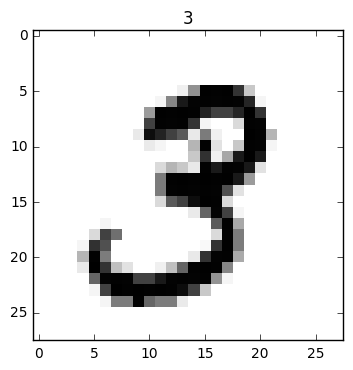

In [5]:
from matplotlib import pyplot as plt # importa pacote para mostrar imagens

# mostra a primeira imagem no set de treino
plt.imshow(data.train.images[1].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.title(str(data.train.labels[1])) # anotação do dígito
plt.show()

### Definindo os hiper-parâmetros
Tudo parece OK com os nossos dados. Podemos então começar a construção da rede neural. O primeiro passo é definir os hiper-parâmetros do modelo. Diferentemente dos parâmetros da rede, os \\(w\\), os hiper-parâmetros não são naturalmente aprendidos durante o treinamento e devem ser ajustados à mão. Alguns dos hiper-parâmetros mais importantes da rede neural são o número de camadas e o número de neurônios em cada camada. Esses hiper-parâmetros definem a capacidade da rede neural e, por meio deles, podemos ajustar o [*trade-off* entre erro por viés e por variância](https://matheusfacure.github.io/AM-Essencial/#Viés-e-variância). Quanto maior o número de neurônios, mais potente será a rede neural, mas maior será a probabilidade dela sofrer com sobre-ajustamento.

Outros hiper-parâmetros da rede neural são o tamanho do punhado de dados usado durante a otimização e o tamanho do passo dado a cada iteração de treino. Em outras palavras, o tamanho do punhado de dados define quão precisa será nossa estimativa local da superfície de custo, enquanto que a taxa de aprendizado definirá o tamanho do passo em cada descida nessa superfície de custo.

Outro detalhe importante é que a rede neural que vamos construir não tem apenas um neurônio na camada de saída, mas 10 neurônios. Casa neurônios representará a probabilidade da imagem conter um dos dígitos de 0 a 9. 

In [6]:
# definindo constantes
lr = 0.01 # taxa de aprendizado
n_iter = 1000 # número de iterações de treino
batch_size = 128 # qtd. de imagens no punhado de dados
n_inputs = 28 * 28 # número de variáveis (pixeis)
n_l1 = 512 # número de neurônios da primeira camada
n_l2 = 512 # número de neurônios da segunda camada
n_outputs = 10 # número de neurônios da camada de saída

Nossa rede neural terá duas camadas, cada uma com 512 neurônios. 

### Construindo a rede neural

Felizmente, não precisamos construir uma rede neural do zero. Como elas são extremamente populares, outras pessoas já as deixaram pré-montada para facilitar a nossa vida. A única coisa que precisamos fazer é dizer quais serão os hiper-parâmetros da rede neural que o pacote TensorFlow tomará conta de construí-la para nós.

O primeiro passo é converter os dados para um formato com que TensorFlow consiga trabalhar facilmente. Isso é feito com o comando `tf.contrib.learn.infer_real_valued_columns_from_input(...)` e passamos como argumento desse comando as imagens de treino. Por fim, passamos os hiper-parâmetros definidos acima para o comando `DNNClassifier(...)`, o que cria a nossa rede neural e a armazena em `deep_ann`.

In [7]:
# converte os dados
x_input = tf.contrib.learn.infer_real_valued_columns_from_input(data.train.images)

# cria a rede neural
deep_ann = DNNClassifier(hidden_units = [n_l1, n_l2], # qtd. de neurônios por camada
                        feature_columns = x_input, # camada de entrada (dados)
                        n_classes = n_outputs, # número de classes (10 dígitos)
                        activation_fn = tf.nn.relu, # função de ativação das camadas
                        optimizer = tf.train.AdamOptimizer(learning_rate=lr)) # otimizador 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9a2d858ba8>, '_task_id': 0, '_model_dir': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_num_worker_replicas': 0, '_save_checkpoints_steps': None, '_master': '', '_environment': 'local', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_task_type': None, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_is_chief': True}


### Treinando e Avaliando a RNA

Para treinar a rede neural criada acima basta um único comando do TensorFlow. Esse comando vem com o nosso modelo de rede neural e podemos acessá-lo com a notação de ponto a partir da rede neural criada acima: `deep_ann.fit(...)`. Passamos ao comando as imagens de treino com os respectivos dígitos anotados. Lembre-se de que esse é um problema de aprendizado de máquina supervisionado e de que a tarefa da rede neural é aprender como mapear dos valores numéricos dos pixeis no dígito que está escrito na imagem. Por isso, precisamos passar também as anotações das imagens de treino: `data.train.labels`. Antes de passar esses dados à rede neural, precisamos convertê-los para os tipos aceitos pelo modelo. As imagens devem ser do tipo `float32` (dígitos com casas decimais), enquanto que as anotações devem ser do tipo `int64` (dígitos inteiros, sem casas decimais).  Por fim, passamos para o comando de treinamento o número de iterações de treino (passos na caminhada para baixo na superfície de custo).

In [8]:
deep_ann.fit(x=data.train.images.astype(np.float32), # conversão de tipo
            y=data.train.labels.astype(np.int64), # conversão de tipo
            batch_size=batch_size, # tamanho do punhado de dados
            steps=n_iter) # iterações de treino

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scal

/usr/local/lib/python3.5/dist-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp1trkko6g/model.ckpt.
INFO:tensorflow:loss = 2.37428, step = 1
INFO:tensorflow:global_step/sec: 47.2305
INFO:tensorflow:loss = 0.143084, step = 101 (2.118 sec)
INFO:tensorflow:global_step/sec: 47.1761
INFO:tensorflow:loss = 0.120638, step = 201 (2.120 sec)
INFO:tensorflow:global_step/sec: 47.4831
INFO:tensorflow:loss = 0.255165, step = 301 (2.106 sec)
INFO:tensorflow:global_step/sec: 47.3015
INFO:tensorflow:loss = 0.26809, step = 401 (2.114 sec)
INFO:tensorflow:global_step/sec: 46.6499
INFO:tensorflow:loss = 0.206926, step = 501 (2.144 sec)
INFO:tensorflow:global_step/sec: 47.2371
INFO:tensorflow:loss = 0.0891523, step = 601 (2.117 sec)
INFO:tensorflow:global_step/sec: 47.2558
INFO:tensorflow:loss = 0.0645118, step = 701 (2.116 sec)
INFO:tensorflow:global_step/sec: 47.5285
INFO:tensorflow:loss = 0.148939, step = 801 (2.104 sec)
INFO:tensorflow:global_step/sec: 47.1638
INFO:tensorflow:loss =

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7f9a2d8885f8>, 'optimizer': <tensorflow.python.training.adam.AdamOptimizer object at 0x7f9a2d888278>, 'hidden_units': [512, 512], 'gradient_clip_norm': None, 'activation_fn': <function relu at 0x7f9a437d9ae8>, 'dropout': None, 'embedding_lr_multipliers': None, 'feature_columns': (_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None),), 'input_layer_min_slice_size': None})

Após treinada, precisamos avaliar nossa rede neural nos dados de teste. Para isso, usamos o comando `.evaluate`, que pode ser acessado uma vez que a rede neural for treinada. Passamos os dados e anotações de teste para esse comando e podemos ver a acurácia da rede neural, isto é, a taxa de acerto.

In [9]:
deep_ann.evaluate(data.test.images.astype(np.float32), # variáveis independentes
                  data.test.labels.astype(np.int64)) # variáveis dependentes

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-06-18-14:21:24
INFO

/usr/local/lib/python3.5/dist-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Finished evaluation at 2017-06-18-14:21:25
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.9603, global_step = 1000, loss = 0.145026


{'accuracy': 0.96030003, 'global_step': 1000, 'loss': 0.14502561}

Com apenas 1000 iterações de treino, nossa simples rede neural já consegue uma taxa de acerto de 96%. Isso não é um resultado muito bom, mas já é satisfatório, principalmente se considerarmos quão simples foi treinar esse modelo.

## Próximos Passos
Como já disse, este post é bastante introdutório e tem o propósito de simplesmente instigar a curiosidade sobre aprendizado de máquina. Dentre as coisas que não dá para falar em um post introdutório estão outras arquiteturas de redes neurais (convolucionais, recorrentes, *autoencoders*, *deep-q*, adversárias...), formas de acelerar o treinamento, técnicas de regularização para controlar o sobre-ajustamento, isso sem falar nas outras classes de modelos de aprendizado de máquina, como máquinas de suporte vetoriais, árvores de decisão, Bayes ingênuo, k-vizinhos mais próximos...

Além disso, mesmo em se tratando de redes neurais bem simples como a que treinamos, o nível de abstração desse post é demasiadamente elevado, isto é, não mostrei como construir cada camada de neurônios, como conectá-las nem como construir o algoritmo de treinamento. Embora você possa utilizar aprendizado de máquina sem se preocupar muito com esses detalhes mais mecânicos, conhecê-los é extremamente importante. Entender de fato o funcionamento dos modelos é condição fundamental para solucionar possíveis falhas no treinamento, para descobrir quais modelos utilizar em cada situação e até mesmo para criar novos modelos ou melhorias que possam contribuir para a ciência de aprendizado de máquina. 

Termino com um apelo: não seja um cientista de dados que simplesmente ficam tentando aplicar um modelo caixa preta atrás do outro, na esperança de que algum resolva seu problema. **Isso não é aprendizado de máquina; é tentativa e erro**. Se for estudar aprendizado de máquina, entenda **BEM** as ferramentas que você usa. Entenda a matemática e a mecânica de um algoritmo em seus mínimos detalhes. Se possível, implemente os modelos de aprendizado de máquina sem o auxílio de pacotes. E, por fim, detalhes são muito, muito, muito importantes! São a eles que devemos parte do renascimento atual de IA, então não os deixe passar batido.

Não é difícil encontrar material gratuito e de qualidade na internet, mas também é fácil cair em armadilhas, aprendendo apenas IA em um nível intuitivo, sem se adentrar nos detalhes. Aqui vai então uma pequena lista de onde encontrar conteúdo de qualidade sobre aprendizado de máquina:

<ul>
	<li>Blogs
<ul>
	<li><a href="https://matheusfacure.github.io/tutorials/">{Quinhentos:Nove}</a>: Sou suspeito para falar, mas acredito que meu blog tenha os melhores tutoriais em português sobre aprendizado de máquina. Em parte, eu o criei com o objetivo de corrigir algumas falhas que percebi nos outros blogs sobre AM. Percebi que o conteúdo deles ou eram simplesmente intuitivos, sem aprofundamento na matemática e na implementação dos modelos, ou eram muito técnicos. Por isso, comecei a criar tutoriais estruturados para conter uma explicação intuitiva da técnica explicada, seguida de uma explicação matemática mais aprofundada e terminando com uma implementação bem documentada. Além disso, eu frequentemente <a href="https://matheusfacure.github.io/blog/">posto sobre meus trabalhos </a> para que sirvam como exemplos de aplicações de aprendizado de máquina.</li>
	<li><a href="https://lamfo-unb.github.io/">Blog do LAMFO</a>: O nosso blog é uma excelente fonte tutoriais e exemplos de aplicações de aprendizado de máquina. O LAMFO é a primeira entidade acadêmica no Brasil a tratar de aprendizado de máquina dentro da grande área de ciências humanas (e até onde sei, ainda é a única que atua na área), então acho que posso dizer que somos autoridade nesse assunto.</li>
	<li><a href="http://colah.github.io/">colah's blog</a>: Esse é um dos melhores blogs que conheço sobre aprendizado de máquina. Infelizmente, o conteúdo é mais avançado e com pouco enfoque em questões práticas (aquele problema do qual falei sobre ser muito técnico).</li>
    <li><a href="https://r2rt.com/">R2RT</a>: É um blog excelente, tanto em termos de tutoriais quanto em termos de explicação técnica e matemática por detrás dos algoritmos ensinados. Infelizmente, já começa no nível avançado, sem uma progressão clara entre os tutoriais.</li>
    <li><a href="http://karpathy.github.io/">Andrej Karpathy blog</a>: Andrej Karpathy é um pesquisador extremamente inteligente e que escreve com uma simplicidade incrível para alguém do seu nível de conhecimento. Esse não é um blog sobre tutoriais, mas fala sobre assuntos muito interessantes em aprendizado de máquina, além de fornecer implementações detalhadas e bem documentadas sobre o assunto tratado.</li>
        
</ul>
</li>
	<li>Livros
<ul> 
    <li><a href="http://www.deeplearningbook.org/">Deep Learning (Goodfellow et al, 2016)</a>: Este é o melhor livro de aprendizado de máquina que já li. Em um nível teórico, ele trata tanto das práticas modernas de aprendizado de máquina quanto das fronteiras de pesquisa dessa ciência. Assim, se faz essencial tanto para engenheiros que querem apenas utilizar técnicas já bem estabelecidas quanto para pesquisadores que estão interessados em contribuir para o estado da arte.</li>
    <li><a href="http://shop.oreilly.com/product/0636920052289.do">Hands-On Machine Learning with Scikit-Learn and TensorFlow (Aurélien Géron, 2017)</a>: Este é o melhor livro prático de aprendizado de máquina que já li. Recomendo como um segundo livro, para ser lido após ter entendido bem a teoria e matemática de aprendizado de máquina.
    </li>
    <li><a href="http://shop.oreilly.com/product/0636920052289.do">Introduction to Machine Learning (Ethem Alpaydin, 2009)</a>: Um ótimo livro introdutório, para quem quer começar a estudar aprendizado de máquina.
    </li>
</ul>
</li>
</ul>

## Referências

Esse post abrange o conteúdo que dei em um *workshop* do LAMFO sobre redes neurais. Infelizmente, como as imagens da apresentação não estão com as devidas referências (por falta de espaço no slide), compartilhá-la indiscriminadamente pode se tornar problemática para mim. No entanto, caso queira muito ter acesso à apresentação, me [mande um e-mail](mailto:matheusfacure01@gmail.com) explicando por que a quer que nós do LAMFO veremos o que podemos fazer por você.



## Exercício
Crie uma rede neural para prever se uma pessoa tem renda acima de 50 mil. Os comandos abaixo baixam e formatam os dados. Não se preocupe em entender como isso é feito e foque apenas na construção da rede neural, que pode ser feita de maneira análoga a que vimos acima.

In [10]:
import tempfile
import urllib
import pandas as pd
import numpy as np

# cria uma pasta temporária para salvar os dados
train_file = tempfile.NamedTemporaryFile() 

# baixa os dados
urllib.request.urlretrieve("http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.data", train_file.name)

# nome das colunas
COLUMNS = ["age", "workclass", "fnlwgt", "education", "education_num",
           "marital_status", "occupation", "relationship", "race", "gender",
           "capital_gain", "capital_loss", "hours_per_week", "native_country",
           "income_bracket"]

# le os dados
df = pd.read_csv(train_file, names=COLUMNS, skipinitialspace=True)

# cria os targets
y = (df['income_bracket'].values == '<=50K').astype(int)

# retira os targets dos dados
df.drop('income_bracket', axis=1, inplace=True)

# Escalona as variáveis numéricas
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
df[numerical] = scaler.fit_transform(df[numerical])
X = df.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(X_test.shape)

(21815, 14)
(10746, 14)


In [11]:
# importe os pacotes necessários

# defina os hiper parâmetros
taxa_ap = 0 # taxa de aprendizado
n_iter = 0 # número de iterações de treino
batch_size = 0 # tamanho do punhado de dados
# ...

Nós treinamermos nossa rede neural por 2501 iterações de treino. A cada iteração, a rede neural ajustará os pesos da soma ponderada dos neurônios. A taxa de aprendizado diz se esse ajuste é grande ou não.



In [12]:
# converta os dados para algo que o tensorflow entenda
x_input = 0

# crie a rede neural
deep_ann = 0

In [13]:
# treine a rede neural


In [14]:
# avalie a rede neural
